In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lambs = [45, 109]    # 45 or 109 lambdas
time_per_step = 0.01  #ns or 10 ps
cutoff_WL = -2

for 45 lambdas
Found it! 9176 -2.010301068435109
time_to_convergence= 91.76 ns
for 109 lambdas
Found it! 19351 -2.010301068435109
time_to_convergence= 193.51 ns


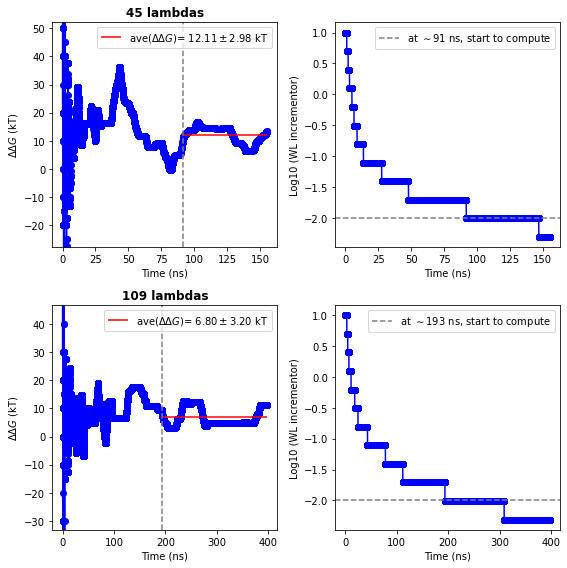

In [3]:
###Plotting ddGs and WL for 45 or 109 lambda data
plt.figure(figsize=(8, 8)) 
A=0
for L in range(len(lambs)):
    print ('for %d lambdas'%lambs[L])
    #Loading ddGs and WL incrementors
    ddGs = np.load('data/%dlambdas_ddGs.npy'%lambs[L])
    log_WLs = np.load('data/%dlambdas_log_WL.npy'%lambs[L])

    for i in range(len(log_WLs)):
        if log_WLs[i] < cutoff_WL:
            print ("Found it!", i, log_WLs[i])
            time_to_convergence = i   #steps
            break
    print ('time_to_convergence=', time_to_convergence *time_per_step, 'ns')

    mean = np.mean(ddGs[time_to_convergence:])
    std = np.std(ddGs[time_to_convergence:])
        
    time_in_ns = np.arange(len(ddGs)) * time_per_step #0.5ps/step in *.log, converting to ns

    plt.subplot(2,2, A+1)
    plt.plot(time_in_ns, ddGs, 'o-', color='b', zorder=1)
    plt.xlabel('Time (ns)')
    plt.ylabel(r'$\Delta \Delta G$ (kT)')
    plt.hlines(y=mean, xmin=time_to_convergence*time_per_step, xmax=len(ddGs)*time_per_step, color='r', 
                    linewidth=1.5, label=r'ave($\Delta \Delta G$)= $%.2f \pm %.2f$ kT'%(mean, std), zorder=2)
    plt.axvline(x=time_to_convergence*time_per_step, c='gray', ls='--', lw=1.5)# label='at $\sim$%d ns'%(time_to_convergence*0.0005))
    plt.ylim(mean-40, mean+40)
    plt.legend()
    plt.title('%d lambdas'%lambs[L], fontweight='bold')
    
    plt.subplot(2,2, A+2)
    plt.plot(time_in_ns, log_WLs, 'o-', color='b')
    plt.xlabel('Time (ns)')
    plt.ylabel('Log10 (WL incrementor)')
    plt.axhline(y= cutoff_WL, c='gray', ls='--', lw=1.5, label='at $\sim$%d ns, start to compute'%(time_to_convergence*time_per_step))
    plt.legend()
    A+=2
plt.tight_layout()
plt.show()